In [136]:
import pandas as pd
import glob
import os
import numpy as np
from matplotlib import pyplot
import seaborn as sns

In [137]:
RESULT_DIR = "./results/results_paper"

In [138]:
def get_latest_results_file(result_dir):    
    list_of_files = glob.glob(result_dir + '/*.csv') 
    latest_file = None
    if list_of_files:
        latest_file = max(list_of_files, key=os.path.getmtime)
    return latest_file

In [139]:
results_file = get_latest_results_file(RESULT_DIR)
df = pd.read_csv(results_file)
display(df)

,dataset,optimizer,iteration,variation,runtime
0,Coffee,ssg-1000-1,22_259148844947086765,0.681415,1422.400345
1,Coffee,ssg-1000-1,26_278625044165697214,0.685753,1695.456543
2,Coffee,ssg-1000-1,6_725852498275213106,0.682278,1811.617571
3,Coffee,ssg-1000-1,0_702019484231540807,0.674569,2088.686428
4,Coffee,ssg-1000-1,2_2159828416395092062,0.675968,2112.318295
...,...,...,...,...,...
1377,CBF,adam-1000-10,25_1773634302987826356,29.276879,422.444226
1378,CBF,adam-1000-10,27_731802505449141472,28.524268,434.411754
1379,CBF,adam-1000-10,29_643026837110879484,26.706990,437.122211
1380,Beef,sgld-1000-10,28_218168397312652698,35.282369,2812.951366


In [140]:
filter_func = lambda x: x['iteration'].count() != 30 or x['variation'].count() != 30 or x['runtime'].count() != 30
df.groupby(['dataset', 'optimizer']).filter(filter_func)

,dataset,optimizer,iteration,variation,runtime
779,OSULeaf,sgld-1000-10,11_1063609276188576724,587.185620,59521.582559
1208,Adiac,sgld-1000-1,24_202005576384338618,25.340477,49078.443476


In [141]:
unfinshed_datasets = df.groupby(['dataset', 'optimizer']).filter(filter_func)['dataset'].unique()
unfinshed_datasets

array(['OSULeaf', 'Adiac'], dtype=object)

In [142]:
filter_datasets = list(unfinshed_datasets)#  + ['FaceFour']
filter_datasets

['OSULeaf', 'Adiac']

In [143]:
df_filtered = df[~df.dataset.isin(filter_datasets)]

In [144]:
df_grouped = df_filtered.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])
display(df_grouped)

variation                   runtime  \
                                             mean         std          mean   
dataset                  optimizer                                            
Beef                     adam-1000-1    42.703718   13.239729   2980.325716   
                         adam-1000-10  102.338255  102.433331   3028.845501   
                         sgld-1000-1    79.195671   41.103251   4342.564454   
                         sgld-1000-10  153.531297   77.427390   2298.040019   
                         ssg-1000-1     16.340137    0.670933   2650.398806   
                         ssg-1000-10    34.433972    5.427792   2858.437137   
CBF                      adam-1000-1    22.120741    1.784746    362.400289   
                         adam-1000-10   27.934244    4.336648    364.604609   
                         ssg-1000-1     18.345070    0.266500    362.631213   
                         ssg-1000-10    21.766736    1.335676    374.600132   
Coffee                   adam-1000-1     0.693506    0.023482   2289.669516   
                         adam-1000-10    0.957467    0.211432   2325.463411   
                         sgld-1000-1     0.746898    0.020084  24570.233185   
                         sgld-1000-10    0.850453    0.331120   4823.515612   
                         ssg-1000-1      0.700734    0.037962   2194.866095   
                         ssg-1000-10     0.865833    0.076729   2428.448016   
FaceFour                 adam-1000-1    48.873069    8.335562   2934.701551   
                         adam-1000-10   72.831306   19.671799   3340.163729   
                         sgld-1000-1    49.919388   20.376840  82176.784732   
                         sgld-1000-10   72.462138   25.864241   8096.293405   
                         ssg-1000-1     35.773728    1.382439   2252.095421   
                         ssg-1000-10    42.708183    2.617225   3761.564156   
FiftyWords               adam-1000-1    34.245521    6.001835   2129.075853   
                         adam-1000-10   54.882221   12.866114   2241.337009   
                         sgld-1000-10  162.296795  218.553926  29582.990617   
                         ssg-1000-1     18.481084    0.492823   2124.576622   
                         ssg-1000-10    29.032622    5.279330   2172.622965   
OliveOil                 adam-1000-1     0.031623    0.001625   5123.255717   
                         adam-1000-10    0.031171    0.001978   5908.406628   
                         sgld-1000-1     0.113838    0.009189   4607.304139   
                         sgld-1000-10    0.113311    0.014062   4832.427570   
                         ssg-1000-1      0.030715    0.000661   2941.970681   
                         ssg-1000-10     0.033804    0.004238   5369.989915   
PhalangesOutlinesCorrect adam-1000-1     3.402319    2.861835    365.494702   
                         adam-1000-10    2.678300    1.206371    342.214019   
                         ssg-1000-1      2.744971    1.213071    378.405017   
                         ssg-1000-10     2.767646    1.189340    359.206855   

                                                     
                                                std  
dataset                  optimizer                   
Beef                     adam-1000-1     169.624180  
                         adam-1000-10    398.964693  
                         sgld-1000-1    1535.929993  
                         sgld-1000-10    676.564783  
                         ssg-1000-1      119.578483  
                         ssg-1000-10     174.909136  
CBF                      adam-1000-1      56.573326  
                         adam-1000-10     62.809054  
                         ssg-1000-1       42.539649  
                         ssg-1000-10      58.723019  
Coffee                   adam-1000-1      48.211470  
                         adam-1000-10     22.877431  
                         sgld-1000-1    2955.611765  
               

In [145]:
df_variation = df_filtered.drop(columns=['runtime'])
df_variation.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])

variation            
                                             mean         std
dataset                  optimizer                           
Beef                     adam-1000-1    42.703718   13.239729
                         adam-1000-10  102.338255  102.433331
                         sgld-1000-1    79.195671   41.103251
                         sgld-1000-10  153.531297   77.427390
                         ssg-1000-1     16.340137    0.670933
                         ssg-1000-10    34.433972    5.427792
CBF                      adam-1000-1    22.120741    1.784746
                         adam-1000-10   27.934244    4.336648
                         ssg-1000-1     18.345070    0.266500
                         ssg-1000-10    21.766736    1.335676
Coffee                   adam-1000-1     0.693506    0.023482
                         adam-1000-10    0.957467    0.211432
                         sgld-1000-1     0.746898    0.020084
                         sgld-1000-10    0.850453    0.331120
                         ssg-1000-1      0.700734    0.037962
                         ssg-1000-10     0.865833    0.076729
FaceFour                 adam-1000-1    48.873069    8.335562
                         adam-1000-10   72.831306   19.671799
                         sgld-1000-1    49.919388   20.376840
                         sgld-1000-10   72.462138   25.864241
                         ssg-1000-1     35.773728    1.382439
                         ssg-1000-10    42.708183    2.617225
FiftyWords               adam-1000-1    34.245521    6.001835
                         adam-1000-10   54.882221   12.866114
                         sgld-1000-10  162.296795  218.553926
                         ssg-1000-1     18.481084    0.492823
                         ssg-1000-10    29.032622    5.279330
OliveOil                 adam-1000-1     0.031623    0.001625
                         adam-1000-10    0.031171    0.001978
                         sgld-1000-1     0.113838    0.009189
                         sgld-1000-10    0.113311    0.014062
                         ssg-1000-1      0.030715    0.000661
                         ssg-1000-10     0.033804    0.004238
PhalangesOutlinesCorrect adam-1000-1     3.402319    2.861835
                         adam-1000-10    2.678300    1.206371
                         ssg-1000-1      2.744971    1.213071
                         ssg-1000-10     2.767646    1.189340

In [146]:
df_plot = df_variation.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])
df_plot.columns = df_plot.columns.to_flat_index()
df_plot.reset_index(inplace=True)

df_plot = pd.melt(df_plot, id_vars=['dataset', 'optimizer'])
display(df_plot)

,dataset,optimizer,variable,value
0,Beef,adam-1000-1,"(variation, mean)",42.703718
1,Beef,adam-1000-10,"(variation, mean)",102.338255
2,Beef,sgld-1000-1,"(variation, mean)",79.195671
3,Beef,sgld-1000-10,"(variation, mean)",153.531297
4,Beef,ssg-1000-1,"(variation, mean)",16.340137
...,...,...,...,...
69,OliveOil,ssg-1000-10,"(variation, std)",0.004238
70,PhalangesOutlinesCorrect,adam-1000-1,"(variation, std)",2.861835
71,PhalangesOutlinesCorrect,adam-1000-10,"(variation, std)",1.206371
72,PhalangesOutlinesCorrect,ssg-1000-1,"(variation, std)",1.213071


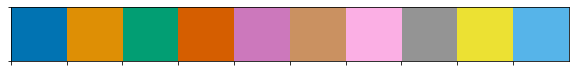

In [147]:
sns.palplot(sns.color_palette("colorblind"))

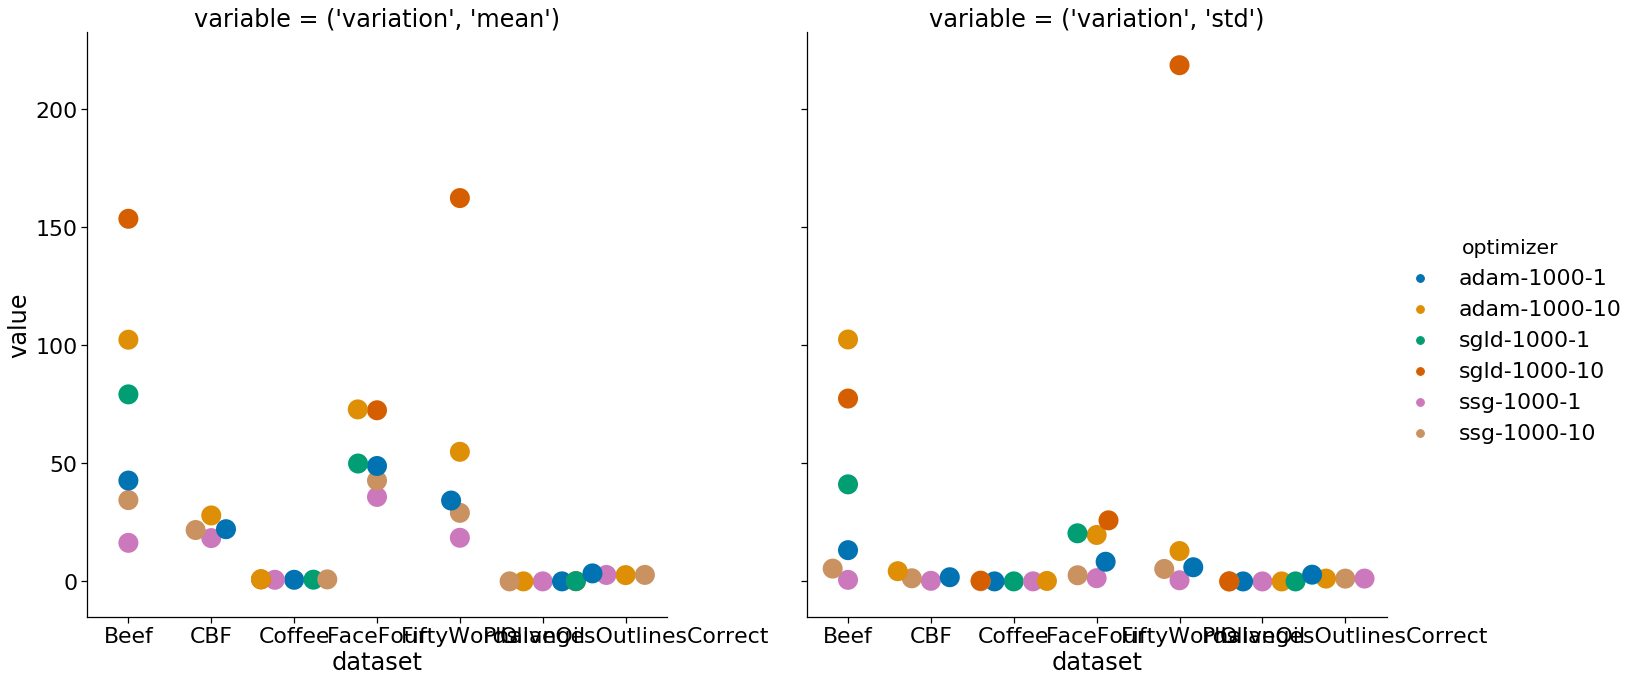

In [148]:
with sns.plotting_context('notebook', font_scale=2):
    sns.catplot(x='dataset', y='value', hue='optimizer', col='variable', data=df_plot, height=10, s=20, kind='swarm', palette='colorblind')

In [149]:
REFERENCE_FILE = "reference/5-sets_reference-results.csv"
df_r = pd.read_csv(REFERENCE_FILE)
df_r.groupby(['dataset']).mean()

,mean,std
dataset,,
Adiac,0.588,0.0140
Beef,23.830,3.4000
CBF,19.300,0.5940
ChlorineConcentration,15.396,0.5420
FiftyWords,21.382,1.7676


In [150]:
df_sign = df.copy()
df_sign['variation_sign'] = np.sign(df.variation)
df_sign.groupby(['dataset', 'optimizer']).variation_sign.value_counts().unstack()

variation_sign                         1.0
dataset                  optimizer        
Adiac                    adam-1000-1    30
                         adam-1000-10   30
                         sgld-1000-1     1
                         sgld-1000-10   30
                         ssg-1000-1     30
                         ssg-1000-10    30
Beef                     adam-1000-1    30
                         adam-1000-10   30
                         sgld-1000-1    30
                         sgld-1000-10   30
                         ssg-1000-1     30
                         ssg-1000-10    30
CBF                      adam-1000-1    30
                         adam-1000-10   30
                         ssg-1000-1     30
                         ssg-1000-10    30
Coffee                   adam-1000-1    30
                         adam-1000-10   30
                         sgld-1000-1    30
                         sgld-1000-10   30
                         ssg-1000-1     30
                         ssg-1000-10    30
FaceFour                 adam-1000-1    30
                         adam-1000-10   30
                         sgld-1000-1    30
                         sgld-1000-10   30
                         ssg-1000-1     30
                         ssg-1000-10    30
FiftyWords               adam-1000-1    30
                         adam-1000-10   30
                         sgld-1000-10   30
                         ssg-1000-1     30
                         ssg-1000-10    30
OSULeaf                  adam-1000-1    30
                         adam-1000-10   30
                         sgld-1000-10    1
                         ssg-1000-1     30
                         ssg-1000-10    30
OliveOil                 adam-1000-1    30
                         adam-1000-10   30
                         sgld-1000-1    30
                         sgld-1000-10   30
                         ssg-1000-1     30
                         ssg-1000-10    30
PhalangesOutlinesCorrect adam-1000-1    30
                         adam-1000-10   30
                         ssg-1000-1     30
                         ssg-1000-10    30